In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd

# Indice


## 1.   Exploración de elementos
## 2.   Consolidación de archivos
## 3.   Concatenar archivos
## 4.   Wide table 
## 5.   Revisión de Nulos y transformación de datos
## 6.   Justificación de elección de manejo de datos





# 1. Exploración de elementos

# 1.1 Primero quiero saber donde estan los elementos que me van a servir para rellenar los Head de las columnas

In [47]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/Modulo 2 final/sdbcol.xlsx', sheet_name='1_01')

# Inspeccionar la fila 2 (index 1) para encontrar 'Notas generales' y su valor
fila_2 = df.iloc[1]  # Fila 2 (index 1)
valor_notas_generales = fila_2['Unnamed: 1']  # Valor en la columna B (Unnamed: 1)

# Inspeccionar la fila 3 (index 2) para encontrar 'Conceptualización' y su valor
fila_3 = df.iloc[2]  # Fila 3 (index 2)
valor_conceptualizacion = fila_3['Unnamed: 1']  # Valor en la columna B (Unnamed: 1)

# Mostrar los resultados
print("Fila 2, Columna A: Notas generales")
print(f"Fila 2, Columna B: {valor_notas_generales}")
print("Fila 3, Columna A: Conceptualización")
print(f"Fila 3, Columna B: {valor_conceptualizacion}")


Fila 2, Columna A: Notas generales
Fila 2, Columna B: Colocaciones totales por tipo de crédito
Fila 3, Columna A: Conceptualización
Fila 3, Columna B: Saldos en millones de pesos


# 1.2 Ahora quiero saber donde estan las filas de los bancos

In [33]:
# Identificar la lista de bancos en la columna B, desde la fila 7 hasta la 32
inicio_bancos = 5  # Fila 5 en Excel corresponde al índice 6 en pandas
fin_bancos = 30  # Fila 30 en Excel corresponde al índice 31 en pandas

# Extraer la lista de bancos
lista_bancos = df.iloc[inicio_bancos:fin_bancos + 1, 1]  # Columna B es el índice 1

# Imprimir la lista de bancos
print("Lista de bancos:")
print(lista_bancos)



Lista de bancos:
5                                         Banco Bice
6                        Banco BTG Pactual Chile (9)
7                                Banco Consorcio (1)
8                                 Banco de Chile (2)
9                     Banco de Crédito e Inversiones
10                 Banco de la Nación Argentina (18)
11                         Banco del Estado de Chile
12                              Banco do Brasil S.A.
13                                   Banco Falabella
14                               Banco Internacional
15                         Banco Itaú Corpbanca (10)
16                                  Banco Paris (13)
17                                  Banco Penta (14)
18                                      Banco Ripley
19                           Banco Santander - Chile
20                                    Banco Security
21                    Banco Sudamericano (4) (5) (6)
22    China Construction Bank, Agencia en Chile (11)
23                        Deu

# 1.3 Quiero saber donde esta la columna que necesito y hasta donde llega

In [34]:

# La columna de septiembre es la última columna, podemos usar el índice negativo para seleccionarla
indice_columna_septiembre = -1  # Última columna

# Extraer los valores de la columna de septiembre (empezando una fila antes que los bancos)
fila_inicio_septiembre = 4  # Fila 5 en Excel corresponde al índice 4 en pandas
fila_fin_septiembre = 31  # Fila 31 en Excel corresponde al índice 30 en pandas

# Extraer los valores de septiembre hasta la fila 31
valores_septiembre = df.iloc[fila_inicio_septiembre:fila_fin_septiembre + 1, indice_columna_septiembre]

# Imprimir los valores de la columna de septiembre
print("Valores de la columna de septiembre:")
print(valores_septiembre)

Valores de la columna de septiembre:
4     2021-09-30 00:00:00
5          7336544.759679
6          1427693.447579
7          4505780.371801
8         36178962.654881
9         28180479.929407
10                     ND
11        29109606.393737
12                      0
13         1465573.227324
14         2150013.987795
15        19414665.946047
16                     ND
17                     ND
18           96457.804918
19        37522725.820464
20         6842168.578796
21                     ND
22          212077.871763
23                     ND
24                     ND
25          144229.033638
26                      0
27                     ND
28        27750522.282798
29                     ND
30                      0
31       202337502.110627
Name: Unnamed: 166, dtype: object


## Durante el proceso de busqueda de los elementos tuve algunos problemas ya que los index indicados por excel en contraste con los index de pandas arrojaron muchas discrepancias, problemas que aparecieron aún teniendo en cuenta desde donde comienzan las cuentas de index en programación, tuve que realizar varias pruebas antes de dar con todo ya que al parecer hay algunas logicas que tienen que ver con el formato y diseño del archivo

# 2. Consolidación de archivos

# 2.1- Comienzo a consolidar archivos excel de los datos que necesito para poder explorar si estoy trayendo todo

También aprovecho de eliminar los numeros en los nombres de los bancos ya que no se especifica que representan

In [48]:
import pandas as pd
import re

# Ruta del archivo
archivo = '/content/drive/MyDrive/Modulo 2 final/sdbcol.xlsx'

# Inicializar el DataFrame consolidado
df_consolidado = pd.DataFrame()

# Lista de subhojas
subhojas = [f'1_{str(i).zfill(2)}' for i in range(1, 11)]

# Extraer la lista de bancos (solo se necesita hacer una vez)
df = pd.read_excel(archivo, sheet_name=subhojas[0])
inicio_bancos = 5
fin_bancos = 30
lista_bancos = df.iloc[inicio_bancos:fin_bancos + 1, 1].tolist()

# Limpiar los nombres de las instituciones financieras
lista_bancos = [re.sub(r'\s*\(.*?\)\s*', '', banco).strip() for banco in lista_bancos]

# Añadir la columna de instituciones financieras al DataFrame consolidado
df_consolidado['Institución Financiera'] = lista_bancos

# Iterar a través de las subhojas
contador = 1
for hoja in subhojas:
    # Cargar la subhoja
    df = pd.read_excel(archivo, sheet_name=hoja)

    # Extraer el tipo y subtipo
    tipo = 'Colocaciones'  # Puede cambiar según la estructura de cada archivo
    subtipo = df.iloc[1]['Unnamed: 1']  # Fila 2, Columna B

    # Extraer la conceptualización (Tipo de Moneda)
    tipo_moneda = df.iloc[2]['Unnamed: 1']  # Fila 3, Columna B

    # Extraer los valores de septiembre
    indice_columna_septiembre = -1  # Última columna
    fila_inicio_septiembre = 5  # Ajustado para comenzar después de la fecha
    fila_fin_septiembre = 30  # Incluye hasta la fila 31

    valores_septiembre = df.iloc[fila_inicio_septiembre:fila_fin_septiembre + 1, indice_columna_septiembre].tolist()

    # Crear nombres dinámicos para las columnas
    col_tipo = f'Tipo {contador}'
    col_subtipo = f'Subtipo {contador}'
    col_valor = f'Valor {contador}'
    col_tipo_moneda = f'Tipo de Moneda {contador}'

    # Añadir los datos al DataFrame consolidado
    df_consolidado[col_tipo] = tipo
    df_consolidado[col_subtipo] = subtipo
    df_consolidado[col_valor] = valores_septiembre
    df_consolidado[col_tipo_moneda] = tipo_moneda

    contador += 1

# Exportar el DataFrame consolidado a un archivo Excel
df_consolidado.to_excel('/content/drive/MyDrive/Modulo 2 final/sdbcol_organizado.xlsx', index=False)

# Mostrar el DataFrame consolidado
print("DataFrame consolidado:")
print(df_consolidado)



DataFrame consolidado:
                       Institución Financiera        Tipo 1  \
0                                  Banco Bice  Colocaciones   
1                     Banco BTG Pactual Chile  Colocaciones   
2                             Banco Consorcio  Colocaciones   
3                              Banco de Chile  Colocaciones   
4              Banco de Crédito e Inversiones  Colocaciones   
5                Banco de la Nación Argentina  Colocaciones   
6                   Banco del Estado de Chile  Colocaciones   
7                        Banco do Brasil S.A.  Colocaciones   
8                             Banco Falabella  Colocaciones   
9                         Banco Internacional  Colocaciones   
10                       Banco Itaú Corpbanca  Colocaciones   
11                                Banco Paris  Colocaciones   
12                                Banco Penta  Colocaciones   
13                               Banco Ripley  Colocaciones   
14                    Banco Sant

# 2.1 Repito con el segundo archivo

In [49]:
import pandas as pd
import re

# Ruta del archivo
archivo = '/content/drive/MyDrive/Modulo 2 final/sdbdep.xlsx'

# Inicializar el DataFrame consolidado
df_consolidado = pd.DataFrame()

# Lista de subhojas
subhojas = [f'2_{str(i).zfill(2)}' for i in range(1, 10)]

# Extraer la lista de bancos (solo se necesita hacer una vez)
df = pd.read_excel(archivo, sheet_name=subhojas[0])
inicio_bancos = 5
fin_bancos = 30
lista_bancos = df.iloc[inicio_bancos:fin_bancos + 1, 1].tolist()

# Limpiar los nombres de las instituciones financieras
lista_bancos = [re.sub(r'\s*\(.*?\)\s*', '', banco).strip() for banco in lista_bancos]

# Añadir la columna de instituciones financieras al DataFrame consolidado
df_consolidado['Institución Financiera'] = lista_bancos

# Iterar a través de las subhojas
contador = 1
for hoja in subhojas:
    # Cargar la subhoja
    df = pd.read_excel(archivo, sheet_name=hoja)

    # Extraer el tipo y subtipo
    tipo = 'Depósitos'  # Puede cambiar según la estructura de cada archivo
    subtipo = df.iloc[1]['Unnamed: 1']  # Fila 2, Columna B

    # Extraer la conceptualización (Tipo de Moneda)
    tipo_moneda = df.iloc[2]['Unnamed: 1']  # Fila 3, Columna B

    # Extraer los valores de septiembre
    indice_columna_septiembre = -1  # Última columna
    fila_inicio_septiembre = 5  # Ajustado para comenzar después de la fecha
    fila_fin_septiembre = 30  # Incluye hasta la fila 31

    valores_septiembre = df.iloc[fila_inicio_septiembre:fila_fin_septiembre + 1, indice_columna_septiembre].tolist()

    # Crear nombres dinámicos para las columnas
    col_tipo = f'Tipo {contador}'
    col_subtipo = f'Subtipo {contador}'
    col_valor = f'Valor {contador}'
    col_tipo_moneda = f'Tipo de Moneda {contador}'

    # Añadir los datos al DataFrame consolidado
    df_consolidado[col_tipo] = tipo
    df_consolidado[col_subtipo] = subtipo
    df_consolidado[col_valor] = valores_septiembre
    df_consolidado[col_tipo_moneda] = tipo_moneda

    contador += 1

# Exportar el DataFrame consolidado a un archivo Excel
df_consolidado.to_excel('/content/drive/MyDrive/Modulo 2 final/sdbdep_organizado.xlsx', index=False)

# Mostrar el DataFrame consolidado
print("DataFrame consolidado:")
print(df_consolidado)



DataFrame consolidado:
                       Institución Financiera     Tipo 1  \
0                                  Banco Bice  Depósitos   
1                     Banco BTG Pactual Chile  Depósitos   
2                             Banco Consorcio  Depósitos   
3                              Banco de Chile  Depósitos   
4              Banco de Crédito e Inversiones  Depósitos   
5                Banco de la Nación Argentina  Depósitos   
6                   Banco del Estado de Chile  Depósitos   
7                        Banco do Brasil S.A.  Depósitos   
8                             Banco Falabella  Depósitos   
9                         Banco Internacional  Depósitos   
10                       Banco Itaú Corpbanca  Depósitos   
11                                Banco Paris  Depósitos   
12                                Banco Penta  Depósitos   
13                               Banco Ripley  Depósitos   
14                    Banco Santander - Chile  Depósitos   
15               

# 2.2 Repito con el tercero

In [50]:
import pandas as pd
import re

# Ruta del archivo
archivo = '/content/drive/MyDrive/Modulo 2 final/sdbinv.xlsx'

# Inicializar el DataFrame consolidado
df_consolidado = pd.DataFrame()

# Lista de subhojas
subhojas = [f'3_{str(i).zfill(2)}' for i in range(1, 14)]

# Extraer la lista de bancos (solo se necesita hacer una vez)
df = pd.read_excel(archivo, sheet_name=subhojas[0])
inicio_bancos = 5
fin_bancos = 30
lista_bancos = df.iloc[inicio_bancos:fin_bancos + 1, 1].tolist()

# Limpiar los nombres de las instituciones financieras
lista_bancos = [re.sub(r'\s*\(.*?\)\s*', '', banco).strip() for banco in lista_bancos]

# Añadir la columna de instituciones financieras al DataFrame consolidado
df_consolidado['Institución Financiera'] = lista_bancos

# Iterar a través de las subhojas
contador = 1
for hoja in subhojas:
    # Cargar la subhoja
    df = pd.read_excel(archivo, sheet_name=hoja)

    # Extraer el tipo y subtipo
    tipo = 'Inversiones'  # Puede cambiar según la estructura de cada archivo
    subtipo = df.iloc[1]['Unnamed: 1']  # Fila 2, Columna B

    # Extraer la conceptualización (Tipo de Moneda)
    tipo_moneda = df.iloc[2]['Unnamed: 1']  # Fila 3, Columna B

    # Extraer los valores de septiembre
    indice_columna_septiembre = -1  # Última columna
    fila_inicio_septiembre = 5  # Ajustado para comenzar después de la fecha
    fila_fin_septiembre = 30  # Incluye hasta la fila 31

    valores_septiembre = df.iloc[fila_inicio_septiembre:fila_fin_septiembre + 1, indice_columna_septiembre].tolist()

    # Crear nombres dinámicos para las columnas
    col_tipo = f'Tipo {contador}'
    col_subtipo = f'Subtipo {contador}'
    col_valor = f'Valor {contador}'
    col_tipo_moneda = f'Tipo de Moneda {contador}'

    # Añadir los datos al DataFrame consolidado
    df_consolidado[col_tipo] = tipo
    df_consolidado[col_subtipo] = subtipo
    df_consolidado[col_valor] = valores_septiembre
    df_consolidado[col_tipo_moneda] = tipo_moneda

    contador += 1

# Exportar el DataFrame consolidado a un archivo Excel
df_consolidado.to_excel('/content/drive/MyDrive/Modulo 2 final/sdbinv_organizado.xlsx', index=False)

# Mostrar el DataFrame consolidado
print("DataFrame consolidado:")
print(df_consolidado)



DataFrame consolidado:
                       Institución Financiera       Tipo 1  \
0                                  Banco Bice  Inversiones   
1                     Banco BTG Pactual Chile  Inversiones   
2                             Banco Consorcio  Inversiones   
3                              Banco de Chile  Inversiones   
4              Banco de Crédito e Inversiones  Inversiones   
5                Banco de la Nación Argentina  Inversiones   
6                   Banco del Estado de Chile  Inversiones   
7                        Banco do Brasil S.A.  Inversiones   
8                             Banco Falabella  Inversiones   
9                         Banco Internacional  Inversiones   
10                       Banco Itaú Corpbanca  Inversiones   
11                                Banco Paris  Inversiones   
12                                Banco Penta  Inversiones   
13                               Banco Ripley  Inversiones   
14                    Banco Santander - Chile  

# 3. Concatenar y convertir csv

# 3.1 Quiero comprobar las columnas que tengo en los 3 archivos para prevenir errores de diferencias de cantidad de columnas y codearlo considerando estos posibles errores

In [51]:
import pandas as pd

# Rutas de los archivos
archivos = [
    '/content/drive/MyDrive/Cruze/sdbcol_organizado.xlsx',
    '/content/drive/MyDrive/Cruze/sdbdep_organizado.xlsx',
    '/content/drive/MyDrive/Cruze/sdbinv_organizado.xlsx'
]

# Imprimir el head de cada archivo
for archivo in archivos:
    df = pd.read_excel(archivo)
    print(f"Contenido del archivo {archivo}:")
    print(df.head())
    print("\nColumnas:")
    print(df.columns.tolist())
    print("\n" + "="*80 + "\n")


Contenido del archivo /content/drive/MyDrive/Cruze/sdbcol_organizado.xlsx:
           Institución Financiera        Tipo 1  \
0                      Banco Bice  Colocaciones   
1         Banco BTG Pactual Chile  Colocaciones   
2                 Banco Consorcio  Colocaciones   
3                  Banco de Chile  Colocaciones   
4  Banco de Crédito e Inversiones  Colocaciones   

                                  Subtipo 1           Valor 1  \
0  Colocaciones totales por tipo de crédito  7,336,544.759679   
1  Colocaciones totales por tipo de crédito  1,427,693.447579   
2  Colocaciones totales por tipo de crédito  4,505,780.371801   
3  Colocaciones totales por tipo de crédito 36,178,962.654881   
4  Colocaciones totales por tipo de crédito 28,180,479.929407   

              Tipo de Moneda 1        Tipo 2                 Subtipo 2  \
0  Saldos en millones de pesos  Colocaciones  Colocaciones comerciales   
1  Saldos en millones de pesos  Colocaciones  Colocaciones comerciales   
2  Sa

# 3.2 Concatenar los datasets y guardarlos en un csv con long format para mejorar la posibilidad de exploración de los datos

In [53]:
import pandas as pd

# Función para transformar el DataFrame consolidado de columnas múltiples a long format
def transformar_a_long_format(df, tipo_dato):
    dataframes = []
    # Identificar los conjuntos de columnas
    num_conjuntos = len([col for col in df.columns if 'Tipo' in col])

    for i in range(1, num_conjuntos + 1):
        try:
            temp_df = df[['Institución Financiera', f'Tipo {i}', f'Subtipo {i}', f'Valor {i}', f'Tipo de Moneda {i}']]
            temp_df.columns = ['Institución Financiera', 'Tipo', 'Subtipo', 'Valor', 'Tipo de Moneda']
            dataframes.append(temp_df)
        except KeyError as e:
            print(f"Columnas faltantes en el conjunto {i}: {e}")
            continue

    return pd.concat(dataframes, ignore_index=True)

# Rutas de los archivos
archivos_tipos = [
    ('/content/drive/MyDrive/Cruze/sdbcol_organizado.xlsx', 'Colocaciones'),
    ('/content/drive/MyDrive/Cruze/sdbdep_organizado.xlsx', 'Depósitos'),
    ('/content/drive/MyDrive/Cruze/sdbinv_organizado.xlsx', 'Inversiones')
]

# Lista para almacenar los DataFrames transformados
dataframes = []

# Transformar cada archivo y añadir el resultado a la lista
for archivo, tipo_dato in archivos_tipos:
    df = pd.read_excel(archivo)
    df_transformado = transformar_a_long_format(df, tipo_dato)
    dataframes.append(df_transformado)

# Concatenar todos los DataFrames transformados en uno solo
df_consolidado = pd.concat(dataframes, ignore_index=True)

# Añadir la columna de fecha
df_consolidado['Fecha'] = '2023-09-30'  # Suponiendo que la fecha es constante y es 30 de septiembre de 2023

# Guardar el DataFrame final como un archivo CSV
df_consolidado.to_csv('/content/drive/MyDrive/Cruze/consolidado_final.csv', index=False)

# Mostrar el DataFrame final
print("DataFrame consolidado final:")
print(df_consolidado.head())



Columnas faltantes en el conjunto 11: "['Tipo 11', 'Subtipo 11', 'Valor 11', 'Tipo de Moneda 11'] not in index"
Columnas faltantes en el conjunto 12: "['Tipo 12', 'Subtipo 12', 'Valor 12', 'Tipo de Moneda 12'] not in index"
Columnas faltantes en el conjunto 13: "['Tipo 13', 'Subtipo 13', 'Valor 13', 'Tipo de Moneda 13'] not in index"
Columnas faltantes en el conjunto 14: "['Tipo 14', 'Subtipo 14', 'Valor 14', 'Tipo de Moneda 14'] not in index"
Columnas faltantes en el conjunto 15: "['Tipo 15', 'Subtipo 15', 'Valor 15', 'Tipo de Moneda 15'] not in index"
Columnas faltantes en el conjunto 16: "['Tipo 16', 'Subtipo 16', 'Valor 16', 'Tipo de Moneda 16'] not in index"
Columnas faltantes en el conjunto 17: "['Tipo 17', 'Subtipo 17', 'Valor 17', 'Tipo de Moneda 17'] not in index"
Columnas faltantes en el conjunto 18: "['Tipo 18', 'Subtipo 18', 'Valor 18', 'Tipo de Moneda 18'] not in index"
Columnas faltantes en el conjunto 19: "['Tipo 19', 'Subtipo 19', 'Valor 19', 'Tipo de Moneda 19'] not in

# 3.3 El archivo se guardo como csv, los bancos en la columna 'Institución financiera' van en el mismo orden de los archivos originales y comienzan una nueva serie cuando se cambia el subtipo de dato.

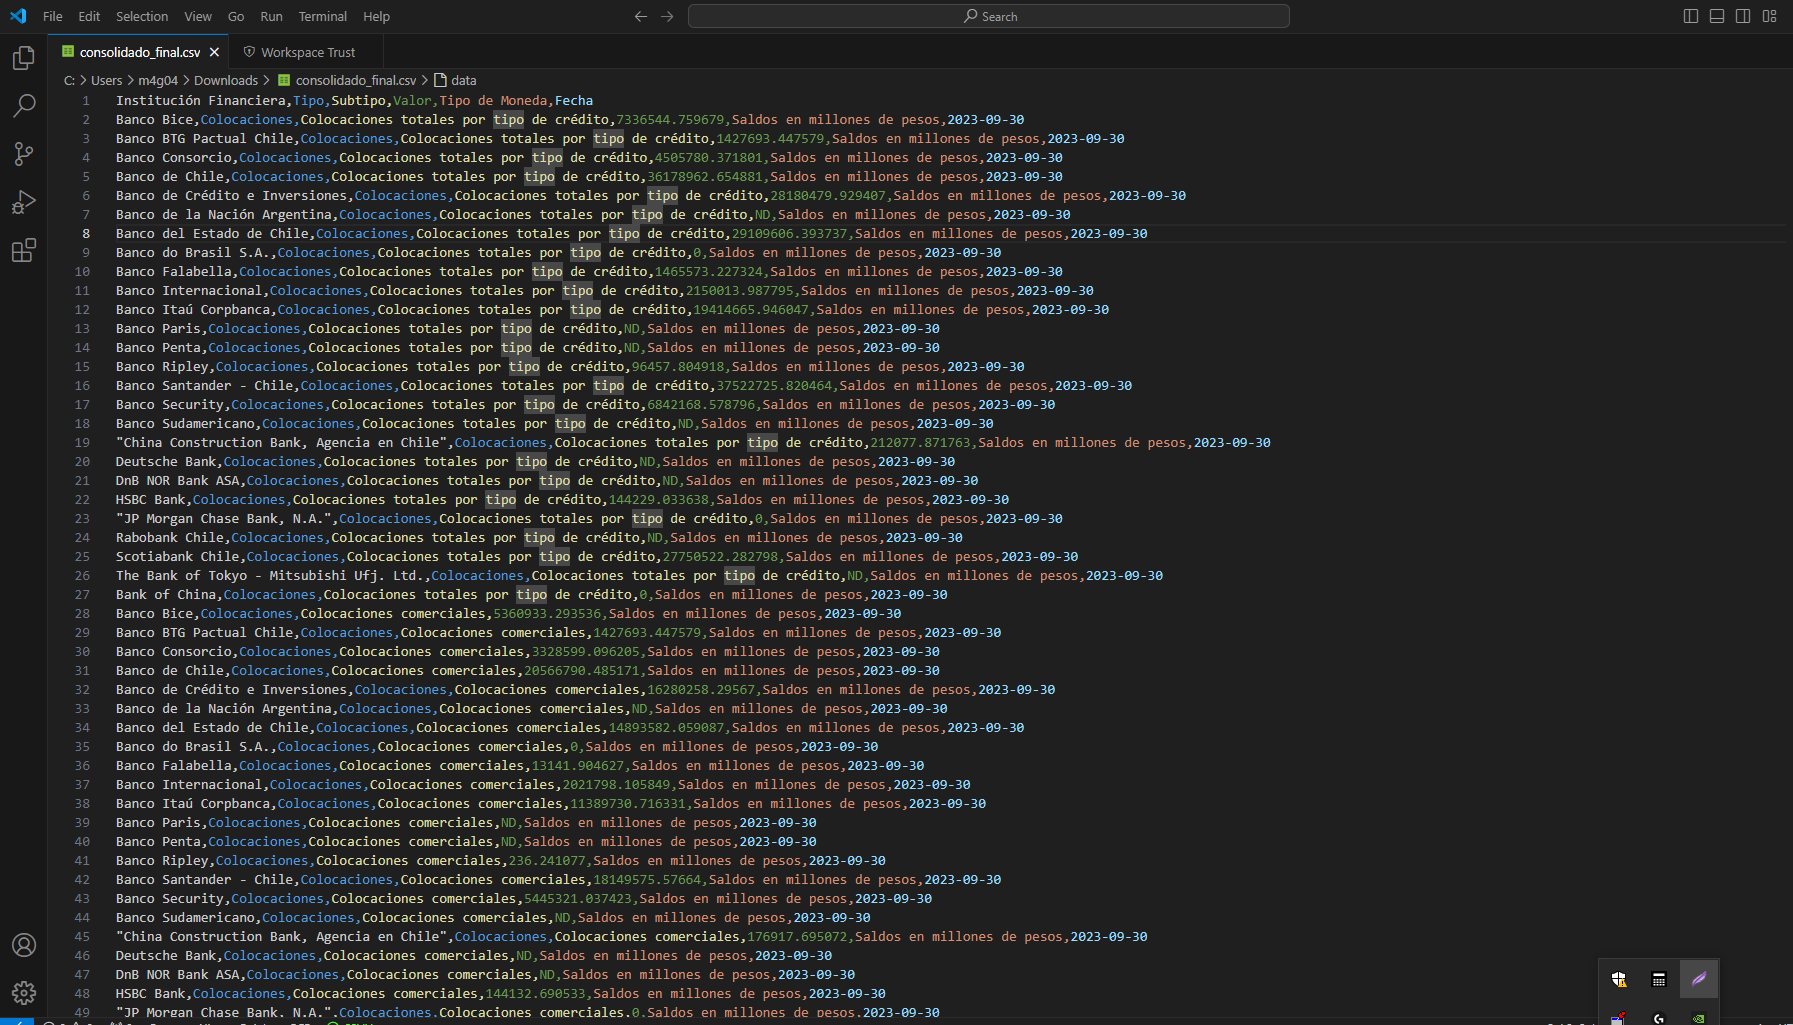

# Elegi no redondear valores y mantener los decimales en el caso de que se planeen hacer operaciones estadisticas precisas y complejas, considerando que tenemos el campo tipo de moneda no deberíamos necesitar redondear para entender que tipo de moneda es.

# 4 Wide table 

# 4.1

Cree una versión formato wide solo por la curiosidad de ver como quedaría, sin embargo por temas de orden visual y en el caso de exploración usando herramientas como pandas, R, SQL, y herramientas de visualización de datos, considero que es mejor la versión long

In [54]:
import pandas as pd

# Función para concatenar los DataFrames y mantener el formato ancho
def concatenar_dfs_wide(archivos_tipos):
    dataframes = []

    for archivo, tipo_dato in archivos_tipos:
        df = pd.read_excel(archivo)
        df['Tipo'] = tipo_dato
        dataframes.append(df)

    # Unir los DataFrames
    df_consolidado = pd.concat(dataframes, axis=1)

    return df_consolidado

# Rutas de los archivos
archivos_tipos = [
    ('/content/drive/MyDrive/Cruze/sdbcol_organizado.xlsx', 'Colocaciones'),
    ('/content/drive/MyDrive/Cruze/sdbdep_organizado.xlsx', 'Depósitos'),
    ('/content/drive/MyDrive/Cruze/sdbinv_organizado.xlsx', 'Inversiones')
]

# Concatenar los DataFrames manteniendo el formato ancho
df_consolidado = concatenar_dfs_wide(archivos_tipos)

# Añadir la columna de fecha
df_consolidado['Fecha'] = '2023-09-30'  # Suponiendo que la fecha es constante y es 30 de septiembre de 2023

# Guardar el DataFrame final como un archivo CSV
df_consolidado.to_csv('/content/drive/MyDrive/Cruze/consolidado_wide_final.csv', index=False)

# Mostrar el DataFrame final
print("DataFrame consolidado final (Formato Wide):")
print(df_consolidado.head())


DataFrame consolidado final (Formato Wide):
           Institución Financiera        Tipo 1  \
0                      Banco Bice  Colocaciones   
1         Banco BTG Pactual Chile  Colocaciones   
2                 Banco Consorcio  Colocaciones   
3                  Banco de Chile  Colocaciones   
4  Banco de Crédito e Inversiones  Colocaciones   

                                  Subtipo 1           Valor 1  \
0  Colocaciones totales por tipo de crédito  7,336,544.759679   
1  Colocaciones totales por tipo de crédito  1,427,693.447579   
2  Colocaciones totales por tipo de crédito  4,505,780.371801   
3  Colocaciones totales por tipo de crédito 36,178,962.654881   
4  Colocaciones totales por tipo de crédito 28,180,479.929407   

              Tipo de Moneda 1        Tipo 2                 Subtipo 2  \
0  Saldos en millones de pesos  Colocaciones  Colocaciones comerciales   
1  Saldos en millones de pesos  Colocaciones  Colocaciones comerciales   
2  Saldos en millones de pesos  Colo

# 5. Revisión de valores Nulos y transformación de datos

In [67]:
df = pd.read_csv('/content/drive/MyDrive/Cruze/consolidado_final.csv')

In [68]:
# Comprobar los tipos de datos de las columnas
tipos_de_datos = df.dtypes

# Imprimir los tipos de datos de las columnas
print("Tipos de datos de las columnas en el DataFrame:")
print(tipos_de_datos)

Tipos de datos de las columnas en el DataFrame:
Institución Financiera    object
Tipo                      object
Subtipo                   object
Valor                     object
Tipo de Moneda            object
Fecha                     object
dtype: object


In [74]:
# Convertir columnas de texto a tipo string
df['Institución Financiera'] = df['Institución Financiera'].astype('string')
df['Tipo'] = df['Tipo'].astype('string')
df['Subtipo'] = df['Subtipo'].astype('string')
df['Tipo de Moneda'] = df['Tipo de Moneda'].astype('string')
# Convertir la columna 'Valor' a numérica (puede tener valores no numéricos que necesitan ser manejados)
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Comprobar los tipos de datos después de la conversión
tipos_de_datos_transformados = df.dtypes

# Imprimir los tipos de datos de las columnas después de la conversión
print("Tipos de datos de las columnas después de la conversión:")
print(tipos_de_datos_transformados)

Tipos de datos de las columnas después de la conversión:
Institución Financiera    string[python]
Tipo                      string[python]
Subtipo                   string[python]
Valor                            float64
Tipo de Moneda            string[python]
Fecha                     datetime64[ns]
dtype: object


In [75]:

# Convertir "ND" a NaN
df.replace("ND", pd.NA, inplace=True)

# Contar los valores nulos en la columna 'Valor'
num_nulos_valor = df['Valor'].isna().sum()

# Proporción de valores nulos en la columna 'Valor'
proporcion_nulos_valor = df['Valor'].isna().mean() * 100

# Imprimir los resultados
print(f"Número de valores nulos en la columna 'Valor': {num_nulos_valor}")
print(f"Proporción de valores nulos en la columna 'Valor': {proporcion_nulos_valor:.2f}%")

Número de valores nulos en la columna 'Valor': 256
Proporción de valores nulos en la columna 'Valor': 30.77%


In [76]:

# Contar los valores 0 en la columna 'Valor'
num_ceros_valor = (df['Valor'] == 0).sum()
proporcion_ceros_valor = (df['Valor'] == 0).mean() * 100

# Imprimir los resultados
print(f"Número de valores 0 en la columna 'Valor': {num_ceros_valor}")
print(f"Proporción de valores 0 en la columna 'Valor': {proporcion_ceros_valor:.2f}%")


Número de valores 0 en la columna 'Valor': 201
Proporción de valores 0 en la columna 'Valor': 24.16%


In [78]:
# Guardar el DataFrame como un archivo CSV
output_path = '/content/drive/MyDrive/Cruze/datos_bancarios_Jp_hernandez.csv'
df.to_csv(output_path, index=False)

print(f"El archivo se ha guardado en {output_path}")

El archivo se ha guardado en /content/drive/MyDrive/Cruze/datos_bancarios_Jp_hernandez.csv



 Dado el rubro de los datos (Bancarios) y la proporción significativa de valores nulos (30.77%) así como la presencia de ceros (24.16%), la estrategia más adecuada es mantener estos valores en su forma original. Esto permite preservar la integridad de los datos y facilita un análisis más preciso y confiable. Los valores nulos y ceros se podrían manejar explícitamente en cualquier análisis posterior, garantizando así la robustez y transparencia de los resultados.

# **Consideraciones Específicas para Datos Bancarios**


**Integridad de los Datos Financieros:**

En el contexto bancario, la precisión de los datos es crucial. La imputación de valores podría introducir errores que afecten las decisiones financieras y la interpretación de los datos.

**Regulaciones y Cumplimiento:**

Los datos bancarios a menudo están sujetos a regulaciones estrictas que requieren la conservación de la integridad y exactitud de los registros financieros.

**Representación Realista:**

En los datos bancarios, los valores nulos y ceros pueden tener significados específicos (por ejemplo, ausencia de transacciones, cuentas sin actividad, etc.). Imputar estos valores podría llevar a una representación incorrecta de la situación financiera.


**Análisis de Riesgo y Tendencias:**

Los análisis de riesgo, tendencias y otros estudios financieros se basan en datos precisos. Los valores nulos y ceros pueden indicar áreas de interés (como riesgos potenciales o segmentos de clientes con actividad nula) que deben ser analizados tal como son.

**Decisiones Basadas en Datos:**

Los bancos y las instituciones financieras toman decisiones importantes basadas en los datos disponibles. Mantener los valores nulos y ceros asegura que las decisiones se basen en una representación precisa de la información financiera.

## **Consideraciones Adicionales**
**Tamaño del Conjunto de Datos:**

**Pocos Datos por Subtipo**: El número de datos por cada subtipo es limitado, incluso habiendo considerado todos los meses disponibles sigue siendo muy pequeño, imputar valores faltantes puede resultar en una representación no precisa de los datos originales. Mantener los valores nulos y ceros evita la introducción de sesgos que podrían surgir de la imputación en un conjunto de datos pequeño.

**Presencia de Valores Cero:**

**Valores Válidos:** Los ceros en el conjunto de datos pueden ser valores válidos que representan una situación real (por ejemplo, ausencia de una transacción). Imputar estos valores podría distorsionar la realidad representada por los datos.

**Equilibrio de los Datos:**

**Desequilibrio Potencial:** Imputar valores en presencia de ceros puede llevar a un desequilibrio significativo en los datos, especialmente si los ceros constituyen una proporción considerable (24.16%). Mantener los valores originales preserva la estructura natural de los datos.